In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Data/framingham_heart_disease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
data = df.dropna()

In [8]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
data.shape

(3656, 16)

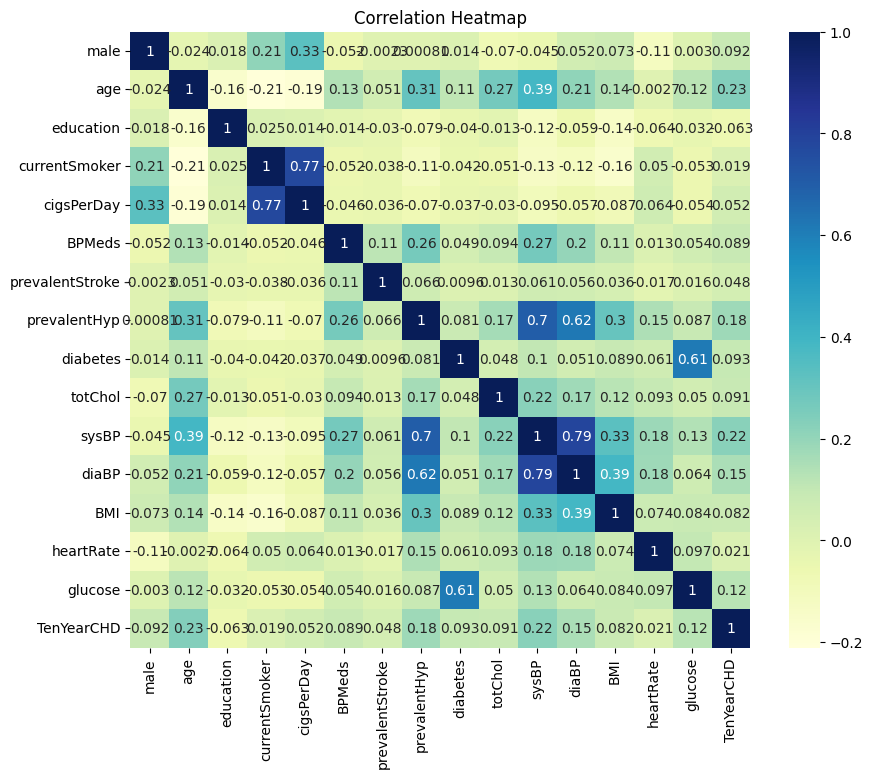

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [22]:
features = data[['male','age','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]

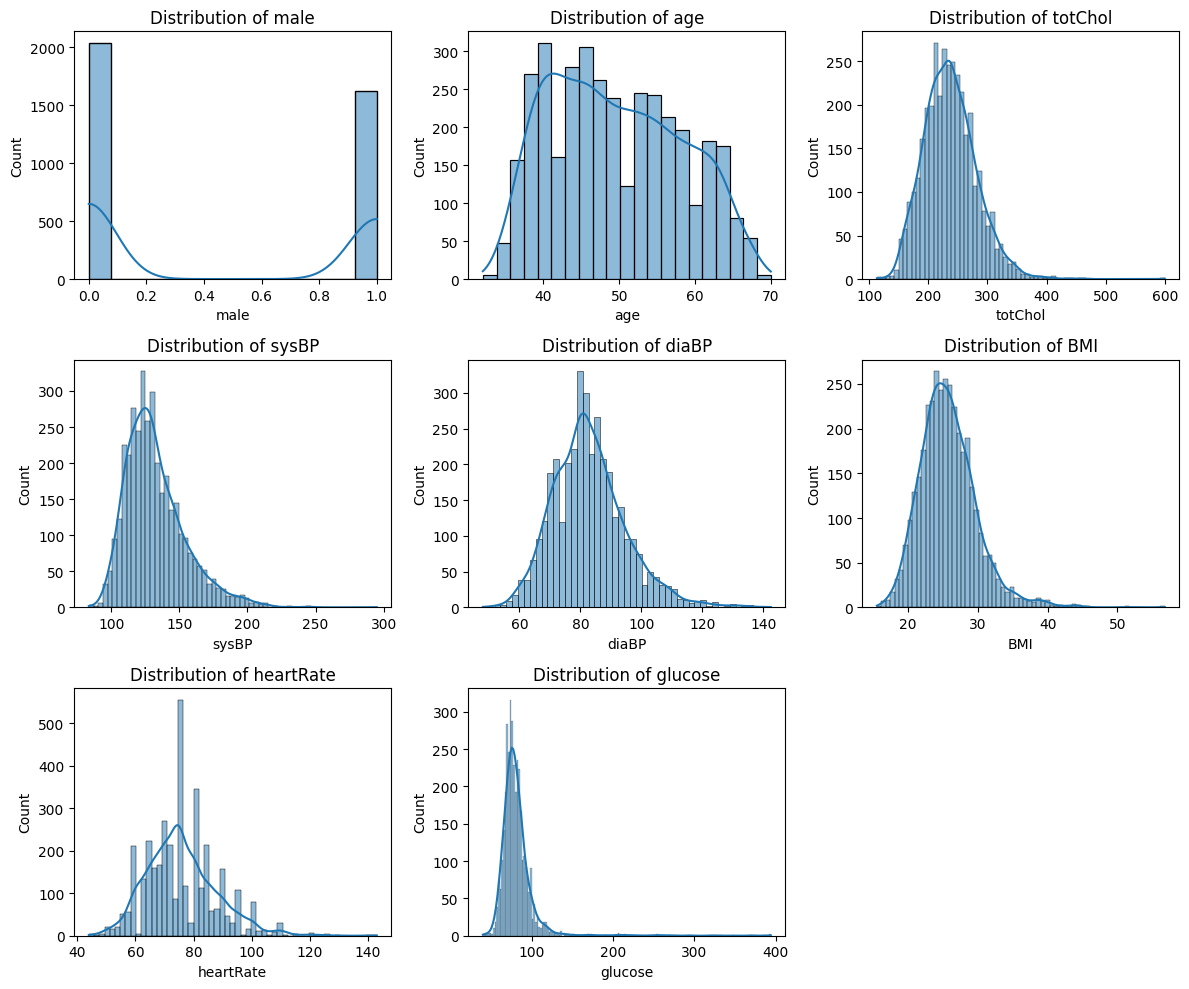

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(['male', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


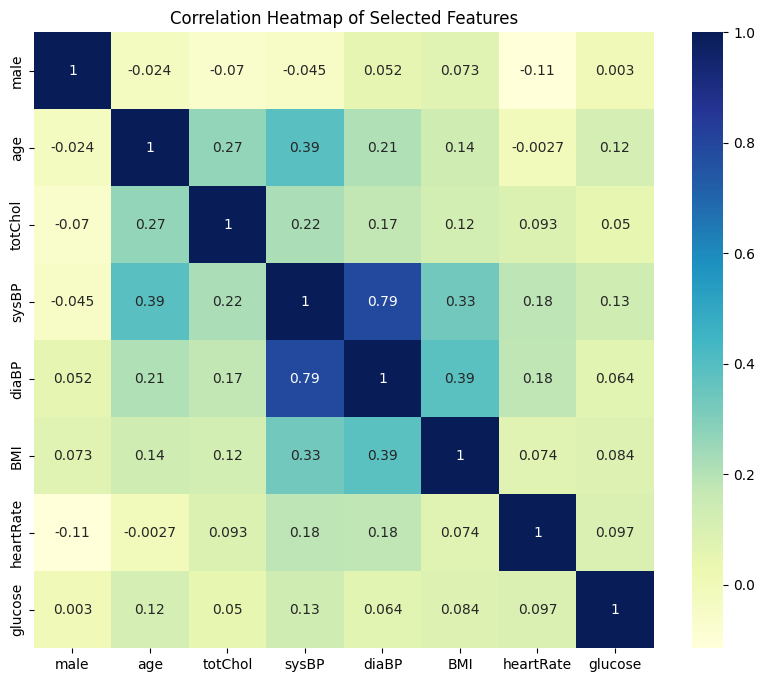

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['male', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler
col = ["age","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
scaler = StandardScaler()

features[col]=scaler.fit_transform(features[col])

In [31]:
features.head()

,male,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.233351,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,0,-0.415591,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,1,-0.181945,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,0,1.336754,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,0,-0.415591,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505


In [35]:
y = data['TenYearCHD']
X = features

In [36]:
x_train , x_test , y_train ,y_test = train_test_split(X,y , test_size = 0.25 , random_state = 42)

In [37]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [39]:
# Predictions on the test set
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)[:, 1]

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8468271334792122


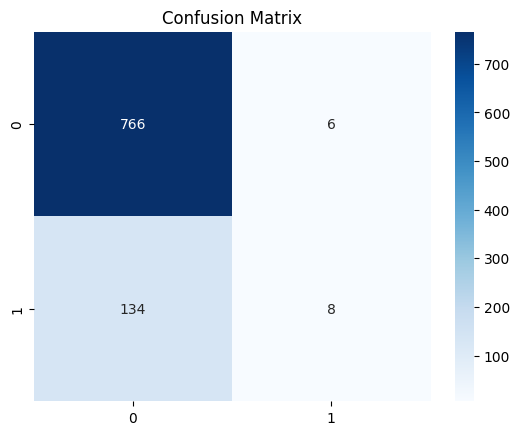

In [40]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       772
           1       0.57      0.06      0.10       142

    accuracy                           0.85       914
   macro avg       0.71      0.52      0.51       914
weighted avg       0.81      0.85      0.79       914



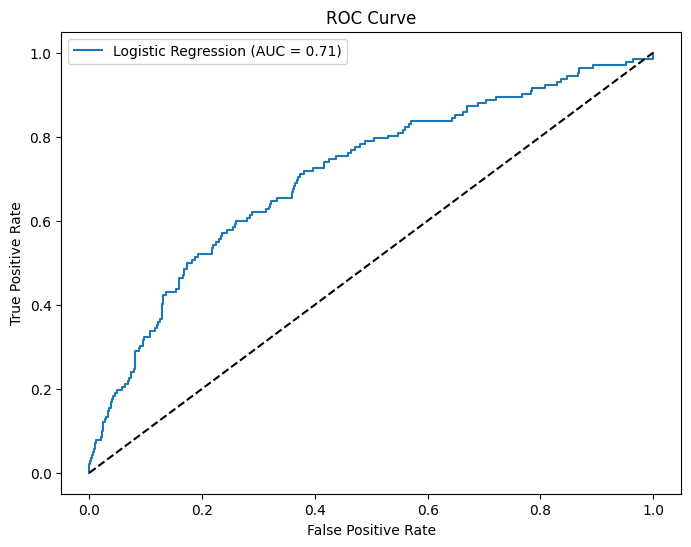

In [42]:
# ROC and AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [44]:
# Best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation accuracy: 0.8526622428666224


In [45]:
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(x_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

     Feature  Coefficient
0       male     0.766284
1        age     0.529765
3      sysBP     0.429553
7    glucose     0.155805
2    totChol     0.131404
5        BMI     0.017577
6  heartRate    -0.042864
4      diaBP    -0.046079


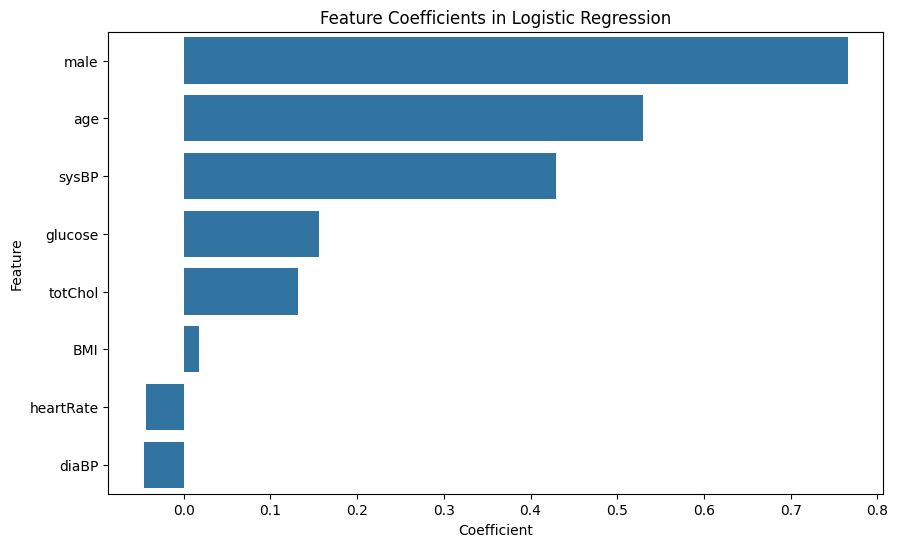

In [46]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_log_reg.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

# Visualizing Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Coefficients in Logistic Regression")
plt.show()


In [47]:
# Perform cross-validation on the best model
cv_scores = cross_val_score(best_log_reg, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.84699454 0.8579235  0.84972678 0.84972678 0.84699454 0.84153005
 0.86027397 0.84931507 0.85479452 0.85205479]
Mean CV Accuracy: 0.8509334531027772
